In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import ttest_rel
from tabulate import tabulate

In [2]:
filename = "resultaty2.csv"

In [3]:
df = pd.read_csv(filename)
df = df.drop(columns='Unnamed: 0')

In [4]:
grouped = df.groupby(by=["layer_size","momentum_value","feature_number"])

In [5]:
def get_n_best_params(grouped_df:pd.DataFrame,n:int=10):
    params = pd.Index(["layer_size","momentum_value","feature_number"])
    n_best = grouped_df.mean().sort_values("score",ascending=False).head(n).reset_index()
    return list(n_best[params].itertuples(index=False,name=None))

In [6]:
def get_scores_for_feature_number(grouped_df, feature_number:int,layer_sizes=(100,200,300),momentums=(0,0.9)):
    scores = []
    lists = grouped_df.score.apply(list)
    for layer_size in layer_sizes:
        for momentum in momentums:
            scores.append(lists[layer_size,momentum,feature_number])
    return scores


def get_scores_for_layer_momentum(grouped_df,layer_size:int,momentum:float, feature_numbers:list):
    scores = []
    lists = grouped_df.score.apply(list)
    for feature_number in feature_numbers:
        scores.append(lists[layer_size,momentum,feature_number])
    return scores

In [28]:
def get_ttest_summary_for_feature_number(grouped_df,feature_number:int, verbose:int=0, layer_sizes=(10,20,30)):
    scores = get_scores_for_feature_number(grouped_df,feature_number,layer_sizes=layer_sizes)

    m = 6
    
    t_statistic = np.zeros((m,m))
    p_value = np.zeros((m,m))
    
    for i in range(m):
        for j in range(m):
            t_statistic[i, j], p_value[i, j] = ttest_rel(scores[i], scores[j])
    
    
    
    headers = ["100, 0", "100, 0.9", "200, 0", "200, 0.9", "300, 0", "300, 0.9"]
    names_column = np.array([["100, 0"], ["100, 0.9"], ["200, 0"], ["200, 0.9"],["300, 0"], ["300, 0.9"]])
    t_statistic_table = np.concatenate((names_column, t_statistic), axis=1)
    t_statistic_table = tabulate(t_statistic_table, headers, floatfmt=".2f")
    p_value_table = np.concatenate((names_column, p_value), axis=1)
    p_value_table = tabulate(p_value_table, headers, floatfmt=".2f")
    if verbose:    
        print("t-statistic:\n", t_statistic_table, "\n\np-value:\n", p_value_table)
    
    
    alpha = .05
    significance = np.zeros((m,m))
    significance[p_value <= alpha] = 1
    significance_table = tabulate(np.concatenate(
        (names_column, significance), axis=1), headers)
    if verbose:    
        print("Statistical significance (alpha = 0.05):\n", significance_table)
    
    
    advantage = np.zeros((m,m))
    advantage[t_statistic > 0] = 1
    advantage_table = tabulate(np.concatenate(
       (names_column, advantage), axis=1), headers)
    if verbose:
        print("Advantage:\n", advantage_table)
    
    stat_better = significance * advantage
    stat_better_table = tabulate(np.concatenate(
        (names_column, stat_better), axis=1), headers)
    print("Statistically significantly better:\n", stat_better_table)

def get_ttest_summary_for_layer_momentum(grouped_df,feature_numbers:list,layer:int,momentum:float, verbose:int=0):
    scores = get_scores_for_layer_momentum(grouped_df=grouped_df,feature_numbers=feature_numbers,
                                           layer_size=layer,momentum=momentum)

    m = len(feature_numbers)
    
    t_statistic = np.zeros((m,m))
    p_value = np.zeros((m,m))
    
    for i in range(m):
        for j in range(m):
            t_statistic[i, j], p_value[i, j] = ttest_rel(scores[i], scores[j])
    
    
    headers = [str(fn) for fn in feature_numbers]
    names_column = np.array([[str(fn)] for fn in feature_numbers])
    t_statistic_table = np.concatenate((names_column, t_statistic), axis=1)
    t_statistic_table = tabulate(t_statistic_table, headers, floatfmt=".2f")
    p_value_table = np.concatenate((names_column, p_value), axis=1)
    p_value_table = tabulate(p_value_table, headers, floatfmt=".2f")
    if verbose:
        print("t-statistic:\n", t_statistic_table, "\n\np-value:\n", p_value_table)
    
    
    alpha = .05
    significance = np.zeros((m,m))
    significance[p_value <= alpha] = 1
    significance_table = tabulate(np.concatenate(
        (names_column, significance), axis=1), headers)
    if verbose:    
        print("Statistical significance (alpha = 0.05):\n", significance_table)
    
    
    advantage = np.zeros((m,m))
    advantage[t_statistic > 0] = 1
    advantage_table = tabulate(np.concatenate(
       (names_column, advantage), axis=1), headers)
    if verbose:
        print("Advantage:\n", advantage_table)
    
    stat_better = significance * advantage
    stat_better_table = tabulate(np.concatenate(
        (names_column, stat_better), axis=1), headers)
    print("Statistically significantly better:\n", stat_better_table)

def get_mean_std_for_params(grouped_df,feature_number,layer_size,momentum):
    scores = grouped_df.score.apply(list)
    return np.mean(scores[layer_size,momentum,feature_number]), np.std(scores[layer_size,momentum,feature_number])

In [44]:
print(get_mean_std_for_params(grouped,14,300,0.9))

print(get_n_best_params(grouped))

for fn in range(8,18):
    print(f"================= Feature number {fn} ====================\n")
    for layer_size in [100,200,300]:
        for momentum in [0.0,.9]:
            mean, std = get_mean_std_for_params(grouped,fn,layer_size,momentum)
            print(f"{layer_size}, {momentum}:\t\t{mean}({std})")

(0.788240453313624, 0.012787544780078687)
[(100, 0.9, 56), (200, 0.0, 55), (300, 0.0, 58), (100, 0.0, 59), (100, 0.0, 54), (100, 0.0, 58), (200, 0.9, 57), (200, 0.0, 56), (300, 0.0, 55), (300, 0.0, 56)]
================= Feature number 8 ====================

100, 0.0:		0.6788016752894801(0.0064870890914358855)
100, 0.9:		0.680360679970436(0.011588138022088286)
200, 0.0:		0.6725888149790589(0.017781083672053444)
200, 0.9:		0.678349347129835(0.01633415091186769)
300, 0.0:		0.6885710766198571(0.01429355564107443)
300, 0.9:		0.6881212121212121(0.017195849436797975)
================= Feature number 9 ====================

100, 0.0:		0.7358373983739838(0.013790586984046086)
100, 0.9:		0.7460527223454053(0.014660258622550375)
200, 0.0:		0.7398428184281843(0.017753330772246795)
200, 0.9:		0.7422828282828282(0.022532664632264318)
300, 0.0:		0.7371899482631189(0.010281525596667075)
300, 0.9:		0.7405119487558511(0.01943164050870026)
================= Feature number 10 ====================

100, 

In [46]:
get_ttest_summary_for_layer_momentum(grouped,list(range(8,18)),300,0.9,True)

t-statistic:
          8       9      10      11      12      13      14      15      16      17
--  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------
 8  nan      -6.07  -13.25   -7.66  -12.53  -15.34  -14.12  -15.28  -14.41  -13.20
 9    6.07  nan      -2.97   -2.09   -3.84   -9.74   -7.22   -5.55   -4.87   -8.23
10   13.25    2.97  nan       1.03   -2.95  -10.21   -6.66   -6.32   -5.04   -7.14
11    7.66    2.09   -1.03  nan      -2.85   -8.43  -11.37   -6.42   -4.24   -6.70
12   12.53    3.84    2.95    2.85  nan      -2.42   -2.09   -3.90   -1.91   -2.37
13   15.34    9.74   10.21    8.43    2.42  nan       0.62   -0.89    1.26    0.22
14   14.12    7.22    6.66   11.37    2.09   -0.62  nan      -1.92    0.62   -0.33
15   15.28    5.55    6.32    6.42    3.90    0.89    1.92  nan       2.67    1.10
16   14.41    4.87    5.04    4.24    1.91   -1.26   -0.62   -2.67  nan      -0.80
17   13.20    8.23    7.14    6.70    2.37   -0.22    0.33   -1.10    0.8

In [36]:
get_ttest_summary_for_feature_number(grouped,14,layer_sizes=[100,200,300],verbose=1)


t-statistic:
             100, 0    100, 0.9    200, 0    200, 0.9    300, 0    300, 0.9
--------  --------  ----------  --------  ----------  --------  ----------
100, 0      nan           0.62     -0.08        1.58     -1.39       -0.08
100, 0.9     -0.62      nan        -0.70        1.68     -1.94       -0.78
200, 0        0.08        0.70    nan           2.11     -1.00       -0.00
200, 0.9     -1.58       -1.68     -2.11      nan        -2.91       -2.08
300, 0        1.39        1.94      1.00        2.91    nan           1.06
300, 0.9      0.08        0.78      0.00        2.08     -1.06      nan 

p-value:
             100, 0    100, 0.9    200, 0    200, 0.9    300, 0    300, 0.9
--------  --------  ----------  --------  ----------  --------  ----------
100, 0      nan           0.55      0.94        0.15      0.20        0.94
100, 0.9      0.55      nan         0.50        0.13      0.08        0.46
200, 0        0.94        0.50    nan           0.06      0.35        1.00
20

In [14]:
filename = "resultaty2.csv"

In [15]:
df = pd.read_csv(filename)
df = df.drop(columns='Unnamed: 0')

In [16]:
grouped = df.groupby(by=["layer_size","momentum_value","feature_number"])

In [41]:
y1 = []
y2 = []
y3 = []
y4 = []
for i in range(1,20):
    #y1.append(grouped.get_group((100,0.9,i)).mean()["score"])
    #y2.append(grouped.get_group((200,0.9,i)).mean()["score"])
    #y3.append(grouped.get_group((300,0.9,i)).mean()["score"])
    
    y1.append(grouped.get_group((100,0,i)).mean()["score"])
    y2.append(grouped.get_group((100,0.9,i)).mean()["score"])
    y3.append(grouped.get_group((300,0,i)).mean()["score"])
    y4.append(grouped.get_group((300,0.9,i)).mean()["score"])
    

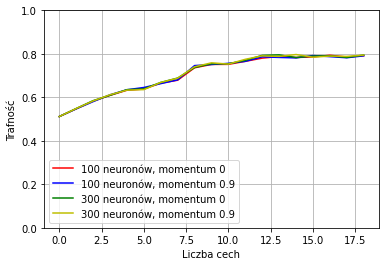

In [42]:

plt.ylim([0,1])
plt.plot(y1,'r',label="100 neuronów, momentum 0")
plt.plot(y2,'b',label="100 neuronów, momentum 0.9")
plt.plot(y3,'g',label="300 neuronów, momentum 0")
plt.plot(y4,'y',label="300 neuronów, momentum 0.9")
plt.ylabel("Trafność")
plt.xlabel("Liczba cech")
plt.legend()
plt.grid(True)

#plt.title("")
#plt.show()

plt.savefig("zmomentum.pdf")